<a href="https://colab.research.google.com/github/aleksanderprofic/Machine-Learning/blob/master/ReinforcementLearning/UpperConfidenceBound/ads_ctr_optimisation_upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


We would like to choose the most profitable ad out of 10 available. 

We are going to do a simulation where users connect to the web page one by one and we show them 1 out of 10 different ads, which they might or might not react to. 

Each row shows how particular user would react to different ads:
  - 1 - user clicks the ad
  - 0 - no reaction

In [3]:
N = len(dataset)
N

10000

There are 10k samples of users connecting to the web page

## Implementing UCB

In [4]:
def ucb_algorithm(N, number_of_ads):
  selected_ads = []

  number_of_selections = np.zeros(number_of_ads)
  sum_of_rewards = np.zeros(number_of_ads)
  total_reward = 0

  for n in range(N):
      ad = 0
      max_upper_bound = 0
      for i in range(number_of_ads):
          if number_of_selections[i] > 0:
              average_reward = sum_of_rewards[i] / number_of_selections[i]
              delta_i = np.sqrt(1.5 * np.log(n + 1) / number_of_selections[i])
              upper_bound = average_reward + delta_i

              if max_upper_bound < upper_bound:
                  max_upper_bound, ad = upper_bound, i
          else:
              ad = i
              break

      selected_ads.append(ad)
      number_of_selections[ad] += 1
      
      reward = dataset.iloc[n, ad]
      sum_of_rewards[ad] += reward
      total_reward += reward
  
  return selected_ads, total_reward

In [5]:
number_of_ads = dataset.columns.shape[0]
selected_ads, total_reward = ucb_algorithm(N=N, number_of_ads=number_of_ads)

## Visualising the results

### Plotting the histogram

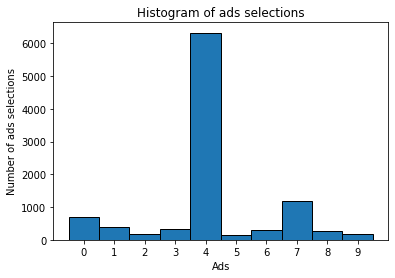

In [6]:
plt.hist(selected_ads, bins=np.arange(number_of_ads + 1) - 0.5, edgecolor='black')
plt.title('Histogram of ads selections')
plt.xticks(range(number_of_ads))
plt.xlabel('Ads')
plt.ylabel('Number of ads selections')
plt.show()

In [7]:
total_reward

2178

Ads was clicked 2178 out of 10000 times

### Finding the optimal number of displayed ads, after which we found the most profitable one

In [8]:
selected_ads, total_reward = ucb_algorithm(N=1000, number_of_ads=number_of_ads)

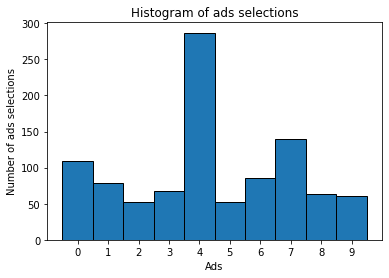

In [9]:
plt.hist(selected_ads, bins=np.arange(number_of_ads + 1) - 0.5, edgecolor='black')
plt.title('Histogram of ads selections')
plt.xticks(range(number_of_ads))
plt.xlabel('Ads')
plt.ylabel('Number of ads selections')
plt.show()

In [10]:
total_reward

155

After ~1000 rounds we clearly found the optimal ad. 

Up till this time, ads was clicked 155 out of 1000 times they were displayed, which is 15.5% of the times.

For comparison, starting from 1000th round, up till the end, there were 9000 ads displayed and 2023 of them were clicked, which is 22.4% of the times.